In [3]:
#Vi du demo voi matrix
import numpy as np

A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(A)

r, c = A.shape
print ( "Old dimension", (r, c) )

scale = 2
r_new = scale*r - 1
c_new = scale*c - 1

B = np.zeros((r_new, c_new))
B[0:r_new:scale, 0:c_new:scale] = A[0:r, 0:c]
print(B)


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Old dimension (4, 3)
[[ 1.  0.  2.  0.  3.]
 [ 0.  0.  0.  0.  0.]
 [ 4.  0.  5.  0.  6.]
 [ 0.  0.  0.  0.  0.]
 [ 7.  0.  8.  0.  9.]
 [ 0.  0.  0.  0.  0.]
 [10.  0. 11.  0. 12.]]


In [10]:
"""
 use bilinear interpolation to resize an image
"""
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

def resizeImage(name, scale):
    img1 = cv2.imread(name)
    old = np.asarray(img1)  # convert to Numpy array
    enlargedShape = list(map(int, [old.shape[0]*scale, old.shape[1]*scale, old.shape[2]]))
    enlargedImg = np.empty(enlargedShape, dtype=np.uint8)
    rowScale = float(old.shape[0]) / float(enlargedImg.shape[0])
    colScale = float(old.shape[1]) / float(enlargedImg.shape[1])
    
    for r in range(enlargedImg.shape[0]):
        for c in range(enlargedImg.shape[1]):
            orir = r * rowScale #Find position in original image
            oric = c * colScale
            enlargedImg[r, c] = GetBilinearPixel(old, oric, orir)
    
    # convert the values to unsigned, 8-bit integers
    # new = new.astype(np.uint8)
    img2 = Image.fromarray(enlargedImg) # convert back to Image
    newName = 'resize.png'
    img2.save(newName)
    img2.show()
    
def GetBilinearPixel(imArr, posX, posY):
    out = []
 
    #Get integer and fractional parts of numbers
    modXi = int(posX)
    modYi = int(posY)
    modXf = posX - modXi
    modYf = posY - modYi
    modXiPlusOneLim = min(modXi+1,imArr.shape[1]-1)
    modYiPlusOneLim = min(modYi+1,imArr.shape[0]-1)
 
    #Get pixels in four corners
    for chan in range(imArr.shape[2]):
        bl = imArr[modYi, modXi, chan]
        br = imArr[modYi, modXiPlusOneLim, chan]
        tl = imArr[modYiPlusOneLim, modXi, chan]
        tr = imArr[modYiPlusOneLim, modXiPlusOneLim, chan]
 
        #Calculate interpolation
        b = modXf * br + (1. - modXf) * bl
        t = modXf * tr + (1. - modXf) * tl
        pxf = modYf * t + (1. - modYf) * b
        out.append(int(pxf+0.5))
 
    return out
def resizeLayer(old, scale):
    rows, cols = old.shape

    # move old points
    rNew = scale*rows - 1
    cNew = scale*cols - 1
    new = np.zeros((rNew, cNew))

    new[0:rNew:scale, 0:cNew:scale] = old[0:rows, 0:cols]

    # produce vertical values
    new[1: rNew:scale, :] = (new[0:rNew-1:2, :] + new[2:rNew:2, :])/2

    # produce horizontal values
    new[:, 1:cNew:scale] = (new[:, 0:cNew-1:2] + new[:, 2:cNew:2])/2

    # produce center values
    new[1:rNew:scale, 1:cNew:scale] = ( new[0:rNew-2:2, 0:cNew-2:2] + 
                                        new[0:rNew-2:2, 2:cNew:2] +
                                        new[2:rNew:2, 0:cNew-2:2] + 
                                        new[2:rNew:2, 2:cNew:2]) / 4
    
    return new




In [11]:
resizeImage('./Image/page.png', 2)

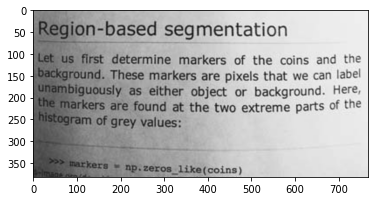

In [15]:
img1 = cv2.imread('resize.png')
plt.imshow(img1)

In [3]:
from PIL import Image 
import numpy as np
name = './Image/page.png';
img1 = Image.open(name)
old = np.asarray(img1)  # convert to Numpy array
rows, cols, layers = old.shape

In [4]:
old.shape

(191, 384, 4)